# **1. Perkenalan Dataset**


Dataset: Breast Cancer Wisconsin (UCI/Kaggle) – Prediksi diagnosis kanker payudara (benign/malignant). Sumber: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic".

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")
print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [19]:
# Load dataset
df = pd.read_csv(r'C:\Users\ADVAN\Documents\College\Dicoding\SML\Eksperimen_SML_Fajar-Wiguna\breast_raw\data.csv')
print("📊 Dataset Shape:", df.shape)
print("\n📋 First 5 rows:")
print(df.head())
print("\n📈 Dataset Info:")
print(df.info())
print("\n📊 Basic Statistics:")
print(df.describe())

📊 Dataset Shape: (569, 33)

📋 First 5 rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_wo

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

=== BASIC EDA ===
Dataset Shape: (569, 33)
Missing Values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_wo

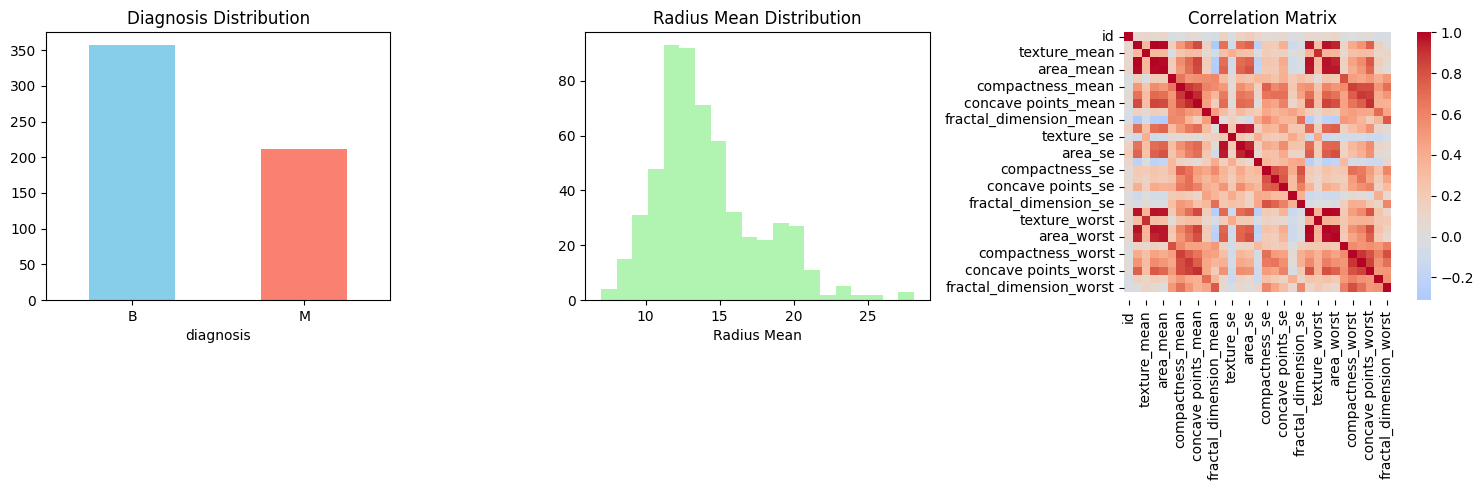

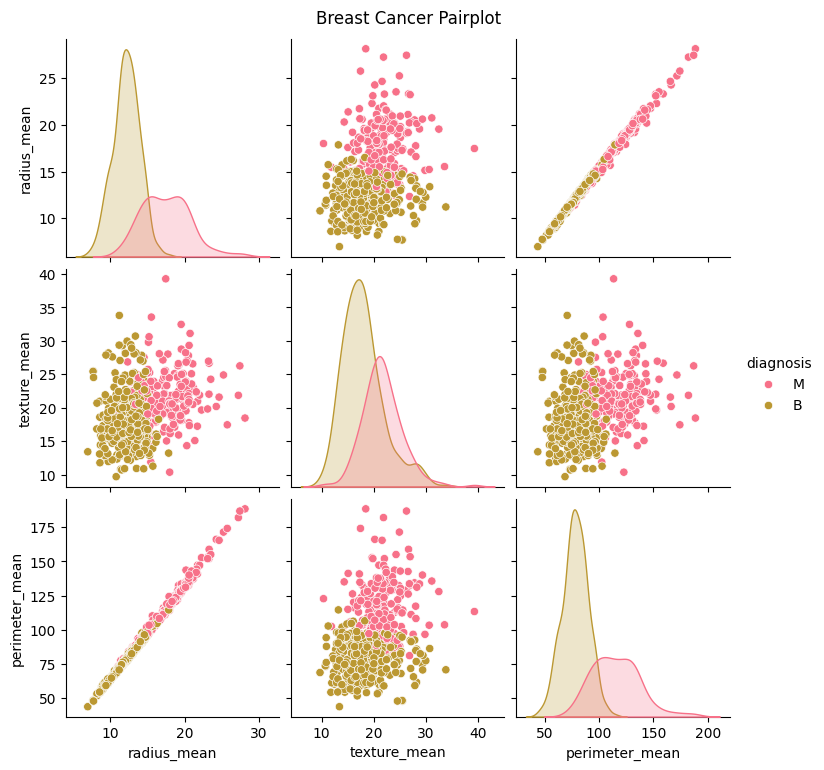

✅ EDA completed!


In [20]:
print("=== BASIC EDA ===")
print(f"Dataset Shape: {df.shape}")
print(f"Missing Values:\n{df.isnull().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
df['diagnosis'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Diagnosis Distribution')
plt.xticks(rotation=0)
plt.subplot(1, 3, 2)
plt.hist(df['radius_mean'], bins=20, alpha=0.7, color='lightgreen')
plt.title('Radius Mean Distribution')
plt.xlabel('Radius Mean')
plt.subplot(1, 3, 3)
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

sns.pairplot(df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean']], hue='diagnosis')
plt.suptitle('Breast Cancer Pairplot', y=1.02)
plt.show()

print("✅ EDA completed!")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [27]:
# 5. Data Preprocessing 
print("=== DATA PREPROCESSING ===")

# Load dataset
df = pd.read_csv(r'C:\Users\ADVAN\Documents\College\Dicoding\SML\Eksperimen_SML_Fajar-Wiguna\breast_raw\data.csv')

# Bersihkan kolom yang tidak perlu
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

# Encode diagnosis: M → 1 (malignant), B → 0 (benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Pisah fitur dan target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# BUAT DATAFRAME + TAMBAH KOLOM TARGET
train_final = pd.DataFrame(X_train_scaled, columns=X_train.columns)
train_final['diagnosis'] = y_train.values          

test_final = pd.DataFrame(X_test_scaled, columns=X_test.columns)
test_final['diagnosis'] = y_test.values            

# Simpan file CSV
train_final.to_csv('breast_preprocessed_train.csv', index=False)
test_final.to_csv('breast_preprocessed_test.csv', index=False)

=== DATA PREPROCESSING ===
Train shape: (455, 30), Test shape: (114, 30)
